In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import MaxNLocator

In [169]:
def plotting(dir_str,plt_name,ttl):
    # Set up the subplots
    # fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))

    # Format y-axis tick labels without decimals
    y_formatter = plt.FormatStrFormatter('%d')
    
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 18))
    C = .5
    # Loop through each row and column
    x_all_cond = []
    for i in range(6):
        x_all = []
        for j in range(3):
            dir_str_ = dir_str[i*3+j]
            x1 = np.loadtxt(os.path.join(dir_str_, '2-rna_bb_rgyr.dat'), usecols=(1))
            x2 = np.loadtxt(os.path.join(dir_str_, '3-rna_bb_rgyr.dat'), usecols=(1))
            x  = np.concatenate((x1,x2), axis=0)
            t = np.arange(0,len(x),1)
            t1 = np.arange(0,len(x1),1)
            x_all = np.concatenate((x_all,x), axis=0)
            
            rep_nu = j+1
            lab = os.path.join('rep ' + str(rep_nu))
            axes[i,0].plot(t * C, x, linewidth = 1, label = lab)
            axes[i,0].vlines(t1[-1]*C, 0, 20,colors='k', linestyles='dashed', label='', alpha=.2, linewidth=1)
            axes[i, 0].yaxis.set_major_locator(MaxNLocator(integer=True))
            
        axes[i, 1].yaxis.set_major_locator(MaxNLocator(integer=True))
        x_all_cond = np.concatenate((x_all_cond,x_all), axis=0)
        mean = np.mean(x_all)
        std = np.std(x_all)
        counts, bins, _ = axes[i,1].hist(x_all, bins=30, color='skyblue', alpha=0.5, orientation='horizontal', density=True)
        axes[i,1].axhline(mean, color='red', linestyle='-', linewidth=2, label='Mean')
        axes[i,1].axhspan(mean - std, mean + std, facecolor='lightgreen', alpha=0.3, label='Mean ± Std')
        axes[i,1].text(0.05, mean+.1, f'Mean: {mean:.1f}', color='red', ha='left', va='center',fontsize=14)
        axes[i,1].text(0.05, mean - std, f'Std: {std:.1f}', color='darkgreen', ha='left', va='center', fontsize=14)
        
        axes[i, 0].set_ylim((15, 17))
        axes[i, 1].set_ylim((15, 17))
        axes[i, 0].set_xlim((0, t[-1]*C))
        axes[i, 1].set_yticklabels([])
        
        axes[0,0].legend()
        
        axes[0, 0].set_ylabel('Theophylline', fontsize = 14)
        axes[1, 0].set_ylabel('1-Methylxanthine', fontsize = 14)
        axes[2, 0].set_ylabel('3-Methylxanthine', fontsize = 14)
        axes[3, 0].set_ylabel('Hypoxanthine', fontsize = 14)
        axes[4, 0].set_ylabel('Xanthine', fontsize = 14)
        axes[5, 0].set_ylabel('Caffeine', fontsize = 14)
        axes[5, 0].set_xlabel('Time (ns)', fontsize = 14)
        
        fig.text(0.0, 0.5, r'R$_{gyr}$ ($\AA$)', va='center', rotation='vertical', fontsize=14)
        fig.suptitle(ttl,y=.9125)
        plt.savefig(os.path.join('/home/arasouli/repos/alchemical/rna_small_molecule_FE/results/rgyr/',plt_name), bbox_inches='tight')

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    mean = np.mean(x_all_cond)
    std = np.std(x_all_cond)
    counts, bins, _ = axes.hist(x_all_cond, bins=30, color='skyblue', alpha=0.5, orientation='horizontal', density=True)
    axes.axhline(mean, color='red', linestyle='-', linewidth=2, label='Mean')
    axes.axhspan(mean - std, mean + std, facecolor='lightgreen', alpha=0.3, label='Mean ± Std')
    axes.text(0.05, mean+.05, f'Mean: {mean:.1f}', color='red', ha='left', va='center',fontsize=18)
    axes.text(0.05, mean - std, f'Std: {std:.1f}', color='darkgreen', ha='left', va='center',fontsize=18)
    axes.set_ylim((15, 17))
    axes.set_ylabel(r'R$_{gyr}$ ($\AA$)', fontsize = 14)
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    fig.suptitle(ttl,y=.94)
    plt_n = 'cond'+ plt_name
    plt.savefig(os.path.join('/home/arasouli/repos/alchemical/rna_small_molecule_FE/results/rgyr/',plt_n), bbox_inches='tight')

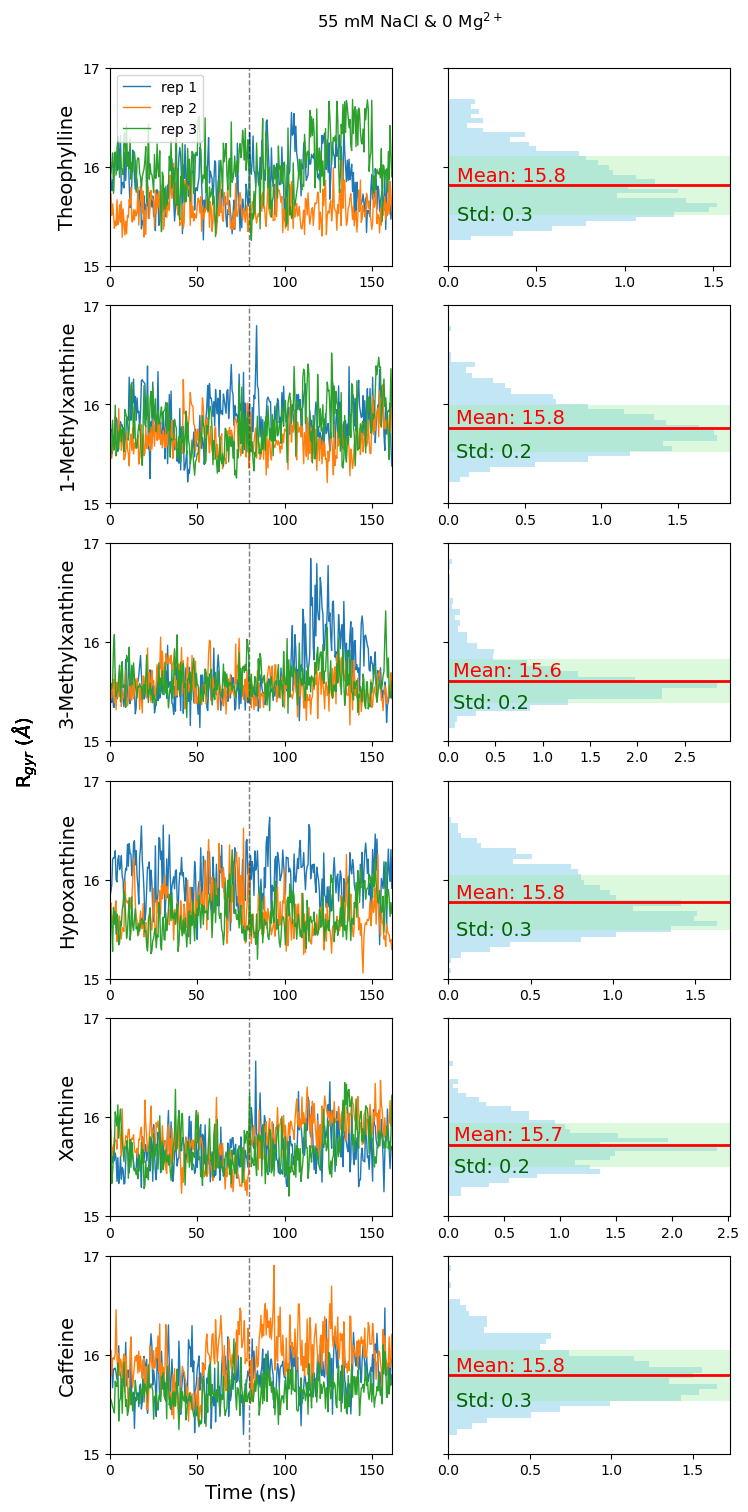

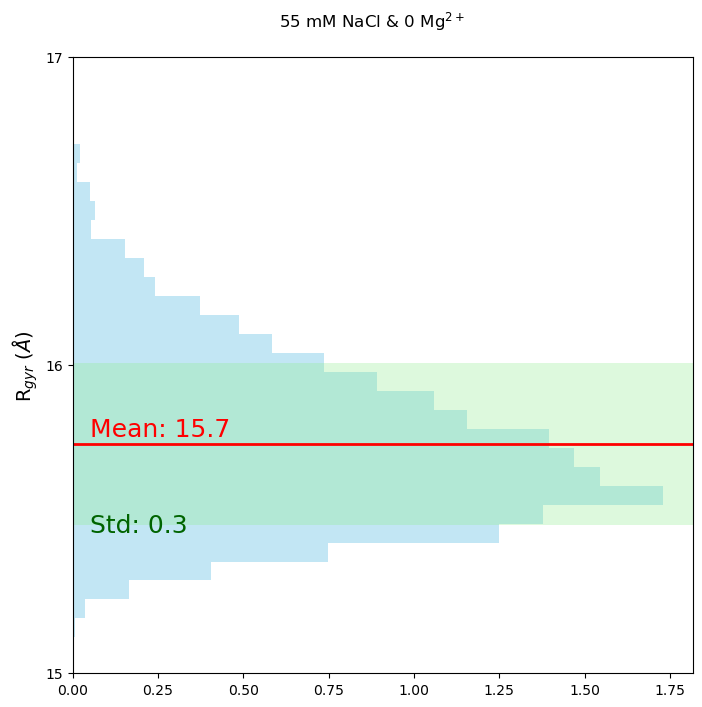

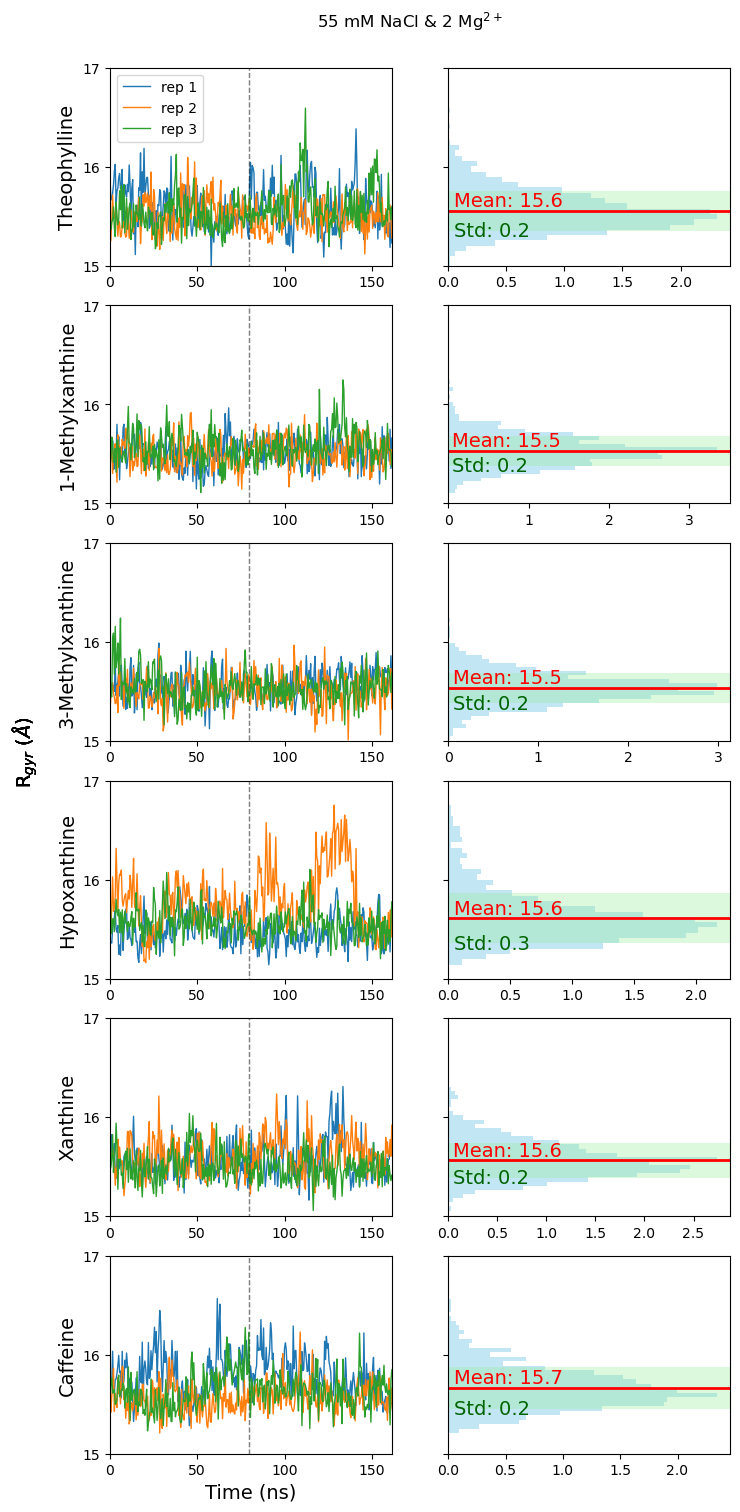

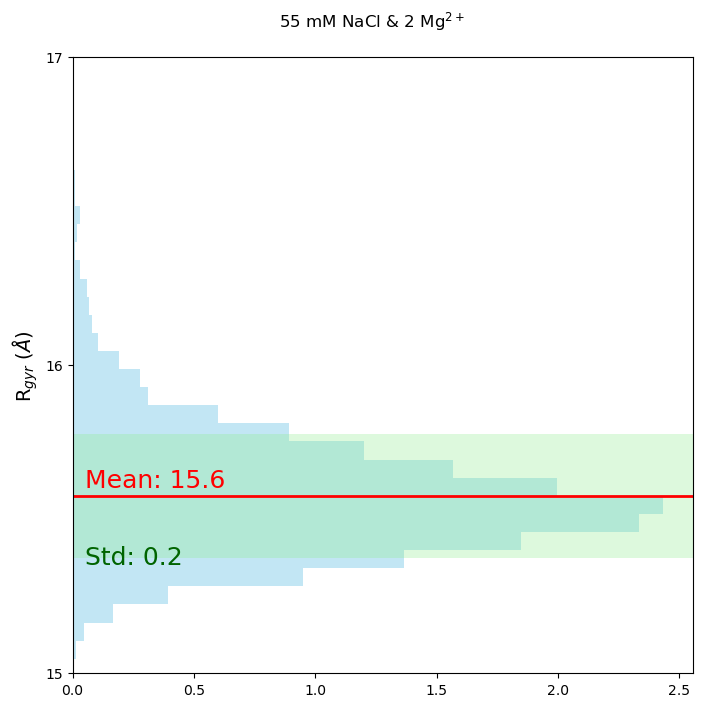

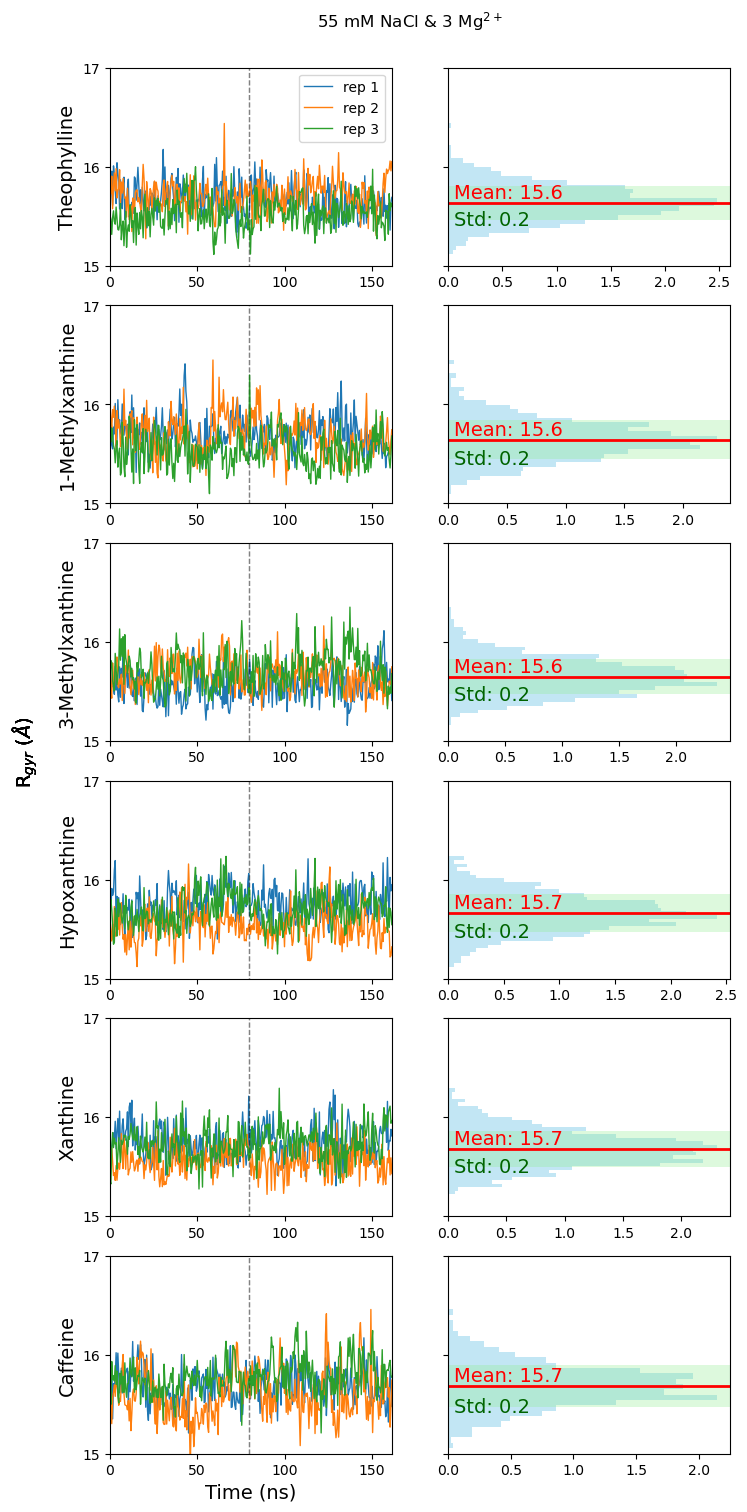

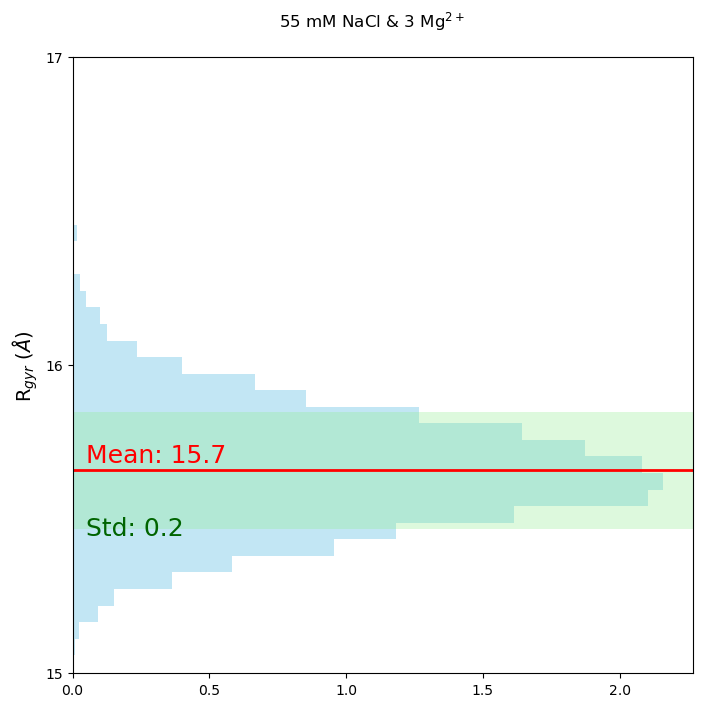

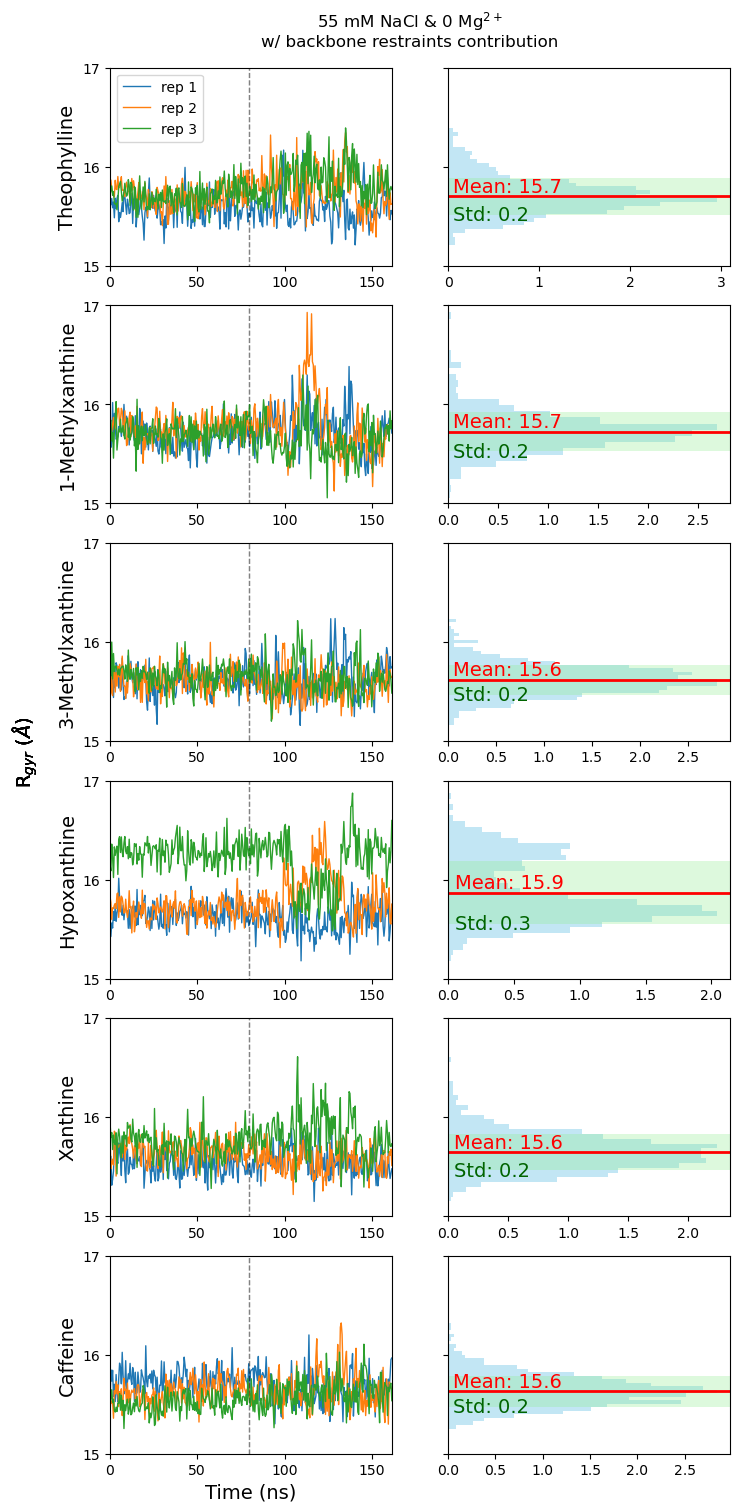

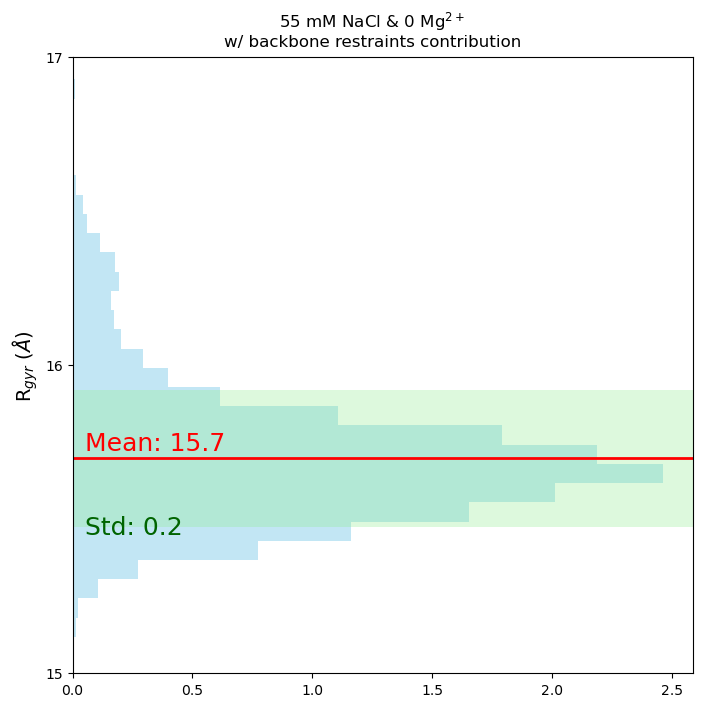

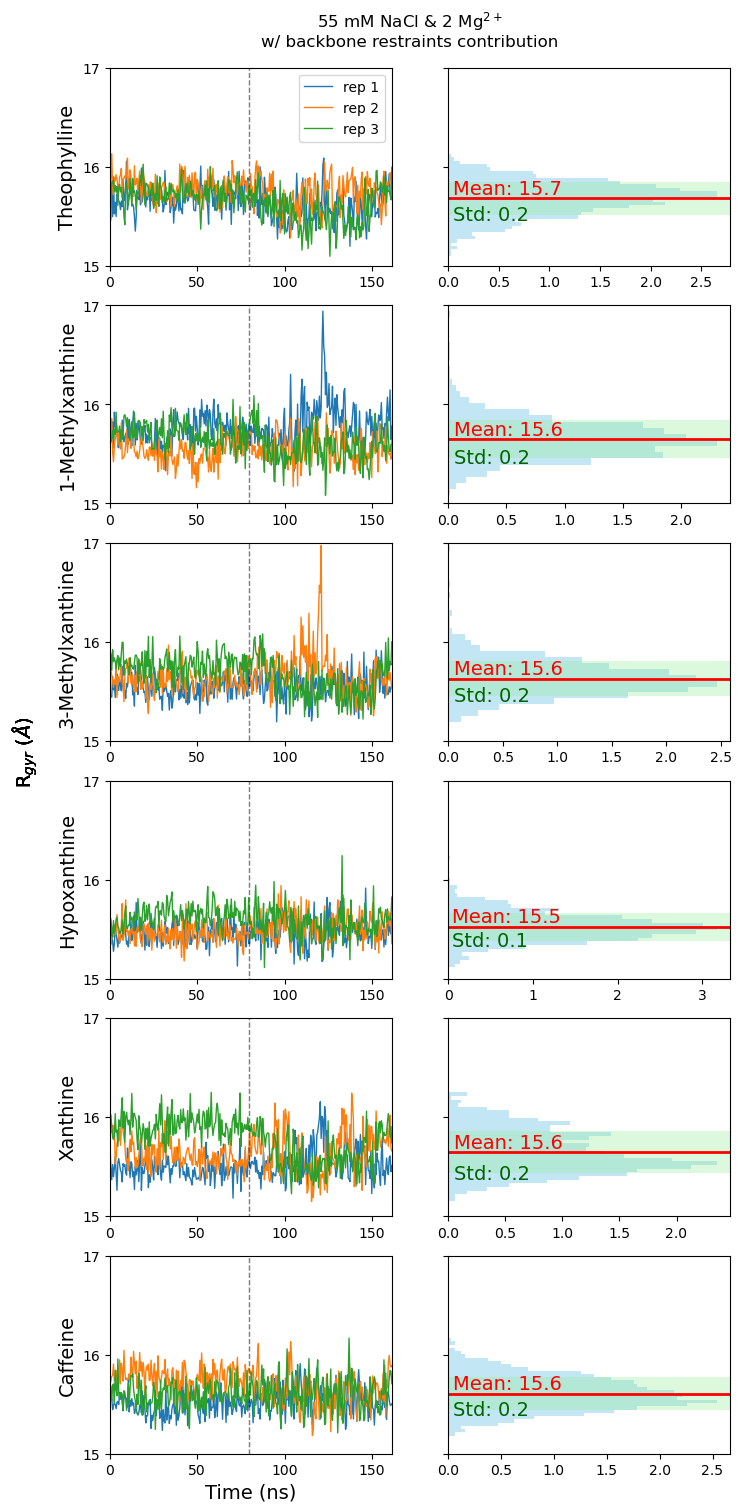

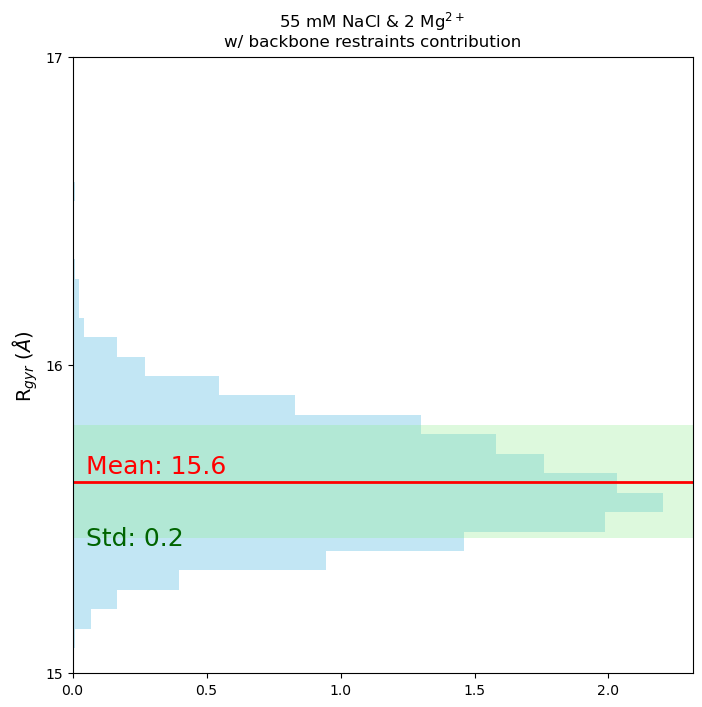

In [171]:
file_dict = {
    #                                    salt cond.   # Mg   water.  lig ff    windows         BB rest. offset         title                     Dir name                       
    '55_NaCl_0Mg_TP3_GAF_40_1ns_unres':['55 NaCl',     '0', 'TIP3P', 'GAFF2', '40 win, 1 ns/win', 'No', 0,   "55 mM NaCl & 0 Mg$^{2+}$",   '4-55NaCl/1-40winCmplx_30winLig'],
    '55_NaCl_2Mg_TP3_GAF_40_1ns_unres':['55 NaCl',     '2', 'TIP3P', 'GAFF2', '40 win, 1 ns/win', 'No', 0,   "55 mM NaCl & 2 Mg$^{2+}$",   '3-55NaCl_Mg/1-40winCmplx_30winLig'],
    '55_NaCl_3Mg_TP3_GAF_40_1ns_unres':['55 NaCl',     '3', 'TIP3P', 'GAFF2', '40 win, 1 ns/win', 'No', 0,   "55 mM NaCl & 3 Mg$^{2+}$",   '1-55NaCl_3Mg/1-40winCmplx_30winLig'],
    '55_NaCl_0Mg_TP3_GAF_40_1ns_BBres':['55 NaCl',     '0', 'TIP3P', 'GAFF2', '40 win, 1 ns/win','Yes', 9.4, "55 mM NaCl & 0 Mg$^{2+}$\nw/ backbone restraints contribution", '9-5NaCl_bb_colvar/1-40winCmplx_30winLig'],
    '55_NaCl_2Mg_TP3_GAF_40_1ns_BBres':['55 NaCl',     '2', 'TIP3P', 'GAFF2', '40 win, 1 ns/win','Yes', 9.7, "55 mM NaCl & 2 Mg$^{2+}$\nw/ backbone restraints contribution", '8-5NaCl_Mg_bb_colvar/1-40winCmplx_30winLig']

}
cmpnd_list = [ '2-theophylline', '3-1_methylxanthine', '4-3_methylxanthine', '5-hypoxanthine', '6-xanthine', '7-caffeine' ]
# rep_list = ['1-rep1', '2-rep2', '3-rep3']

# cond_list = ['1-55NaCl_3Mg/2-OpenFF_40winCmplx_30winLig']

path_acc = "/home/arasouli/repos/alchemical/rna_small_molecule_FE/results/accept_reject_files" 
for key,val in file_dict.items():
    cond_list = val[8]
    ttl = val[7]
    file_pre = key
    # check #Mg and assig the mainDir
    if val[1] == '3':
        mainDir = '/home/arasouli/repos/alchemical/3_mg_rna_small_molecule_FE'
    else:
        mainDir = '/home/arasouli/repos/alchemical/rna_small_molecule_FE'
    
    acc_path = os.path.join(path_acc,key + '_accept.txt')
    content_list = []
    with open(acc_path, 'r') as file:
        for line in file:
            entries = line.strip().split('\t')
            entries_full = [os.path.join(mainDir,entr,'3-analysis/rgyr') for entr in entries]
            content_list.append(entries_full)
    
    fig_name = os.path.join(key + '.pdf')
    for ii in content_list:
        dir_str = ii
    plotting(dir_str,fig_name,ttl)


In [ ]:
def plotting_rmsd(dir_str,plt_name):
    # Set up the subplots
    # fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))

    # Format y-axis tick labels without decimals
    y_formatter = plt.FormatStrFormatter('%d')
    
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 18))
    C = .5
    x_all_cond = []
    # Loop through each row and column
    for i in range(6):
        x_all = []
        for j in range(3):
            dir_str_ = dir_str[i*3+j]
            # print(os.path.join(dir_str_, '2-rna_bb_rmsd.dat'))
            x1 = np.loadtxt(os.path.join(dir_str_, '2-rna_bb_rmsd.dat'), usecols=(1))
            x2 = np.loadtxt(os.path.join(dir_str_, '3-rna_bb_rmsd.dat'), usecols=(1))
            x  = np.concatenate((x1,x2), axis=0)
            t = np.arange(0,len(x),1)
            t1 = np.arange(0,len(x1),1)
            x_all = np.concatenate((x_all,x), axis=0)
            
            rep_nu = j+1
            lab = os.path.join('rep ' + str(rep_nu))
            axes[i,0].plot(t * C, x, linewidth = 1, label = lab)
            axes[i,0].vlines(t1[-1]*C, 0, 20,colors='k', linestyles='dashed', label='', alpha=.2, linewidth=1)
        
        x_all_cond = np.concatenate((x_all_cond,x_all), axis=0)
        mean = np.mean(x_all)
        std = np.std(x_all)
        counts, bins, _ = axes[i,1].hist(x_all, bins=30, color='skyblue', alpha=0.5, orientation='horizontal', density=True)
        axes[i,1].axhline(mean, color='red', linestyle='-', linewidth=2, label='Mean')
        axes[i,1].axhspan(mean - std, mean + std, facecolor='lightgreen', alpha=0.3, label='Mean ± Std')
        axes[i,1].text(0.05, mean+.1, f'Mean: {mean:.1f}', color='red', ha='left', va='center')
        axes[i,1].text(0.05, mean - std, f'Std: {std:.1f}', color='darkgreen', ha='left', va='center')
        
        axes[i, 0].set_ylim((0, 5))
        axes[i, 1].set_ylim((0, 5))
        axes[i, 0].set_xlim((0, t[-1]*C))
        axes[i, 1].set_yticklabels([])
        
        axes[0,0].legend()
        
        axes[0, 0].set_ylabel('Theophylline', fontsize = 14)
        axes[1, 0].set_ylabel('1-Methylxanthine', fontsize = 14)
        axes[2, 0].set_ylabel('3-Methylxanthine', fontsize = 14)
        axes[3, 0].set_ylabel('Hypoxanthine', fontsize = 14)
        axes[4, 0].set_ylabel('Xanthine', fontsize = 14)
        axes[5, 0].set_ylabel('Caffeine', fontsize = 14)
        axes[5, 0].set_xlabel('Time (ns)', fontsize = 14)
        plt.savefig(os.path.join('/home/arasouli/repos/alchemical/rna_small_molecule_FE/results/rgyr/',plt_name), bbox_inches='tight')
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    mean = np.mean(x_all_cond)
    std = np.std(x_all_cond)
    counts, bins, _ = axes.hist(x_all_cond, bins=30, color='skyblue', alpha=0.5, orientation='horizontal', density=True)
    axes.axhline(mean, color='red', linestyle='-', linewidth=2, label='Mean')
    axes.axhspan(mean - std, mean + std, facecolor='lightgreen', alpha=0.3, label='Mean ± Std')
    axes.text(0.05, mean+.1, f'Mean: {mean:.1f}', color='red', ha='left', va='center')
    axes.text(0.05, mean - std, f'Std: {std:.1f}', color='darkgreen', ha='left', va='center')
    axes.set_ylim((1, 4.5))
    plt_n = 'cond'+ plt_name
    plt.savefig(os.path.join('/home/arasouli/repos/alchemical/rna_small_molecule_FE/results/rgyr/',plt_n), bbox_inches='tight')

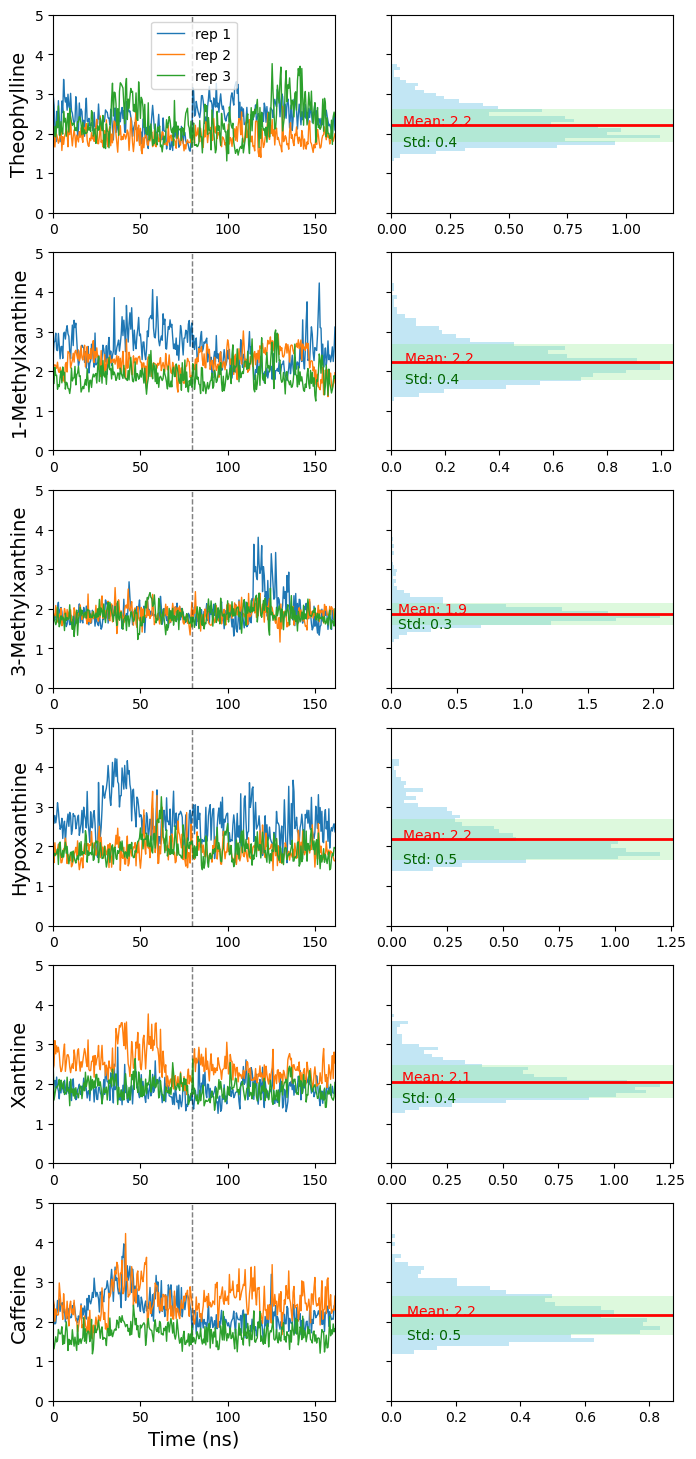

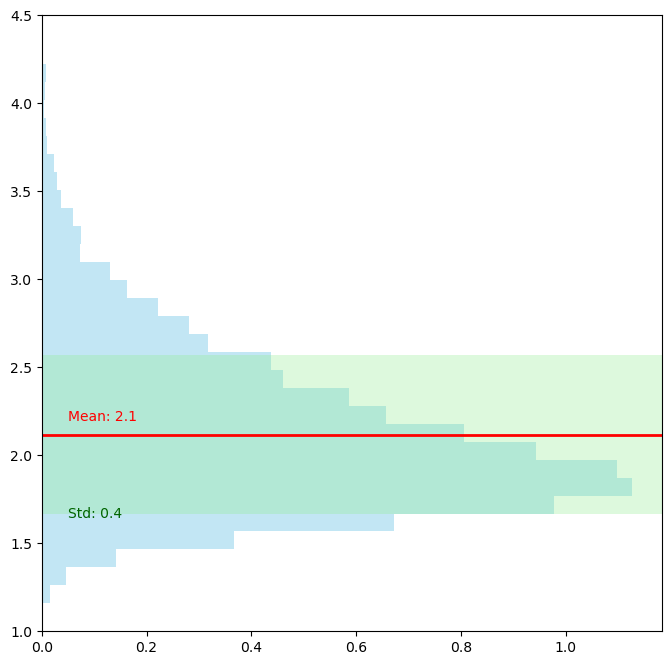

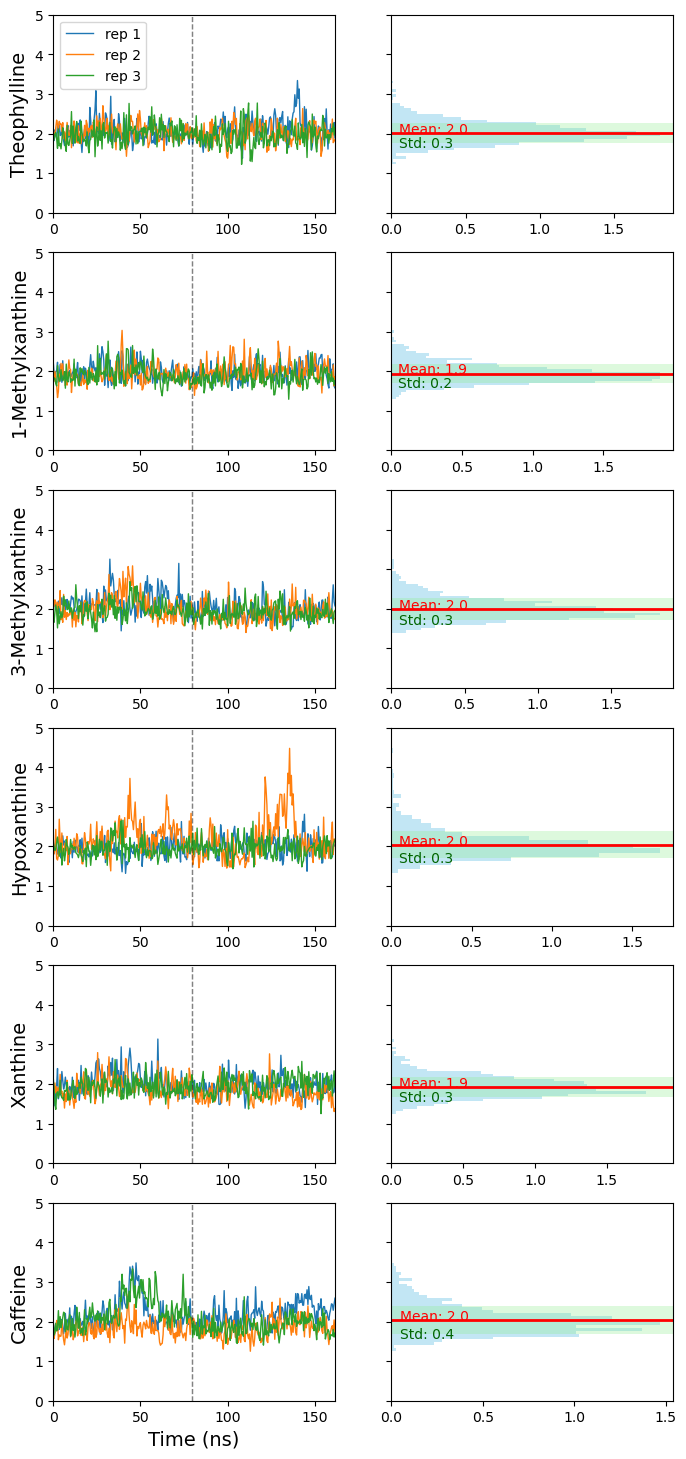

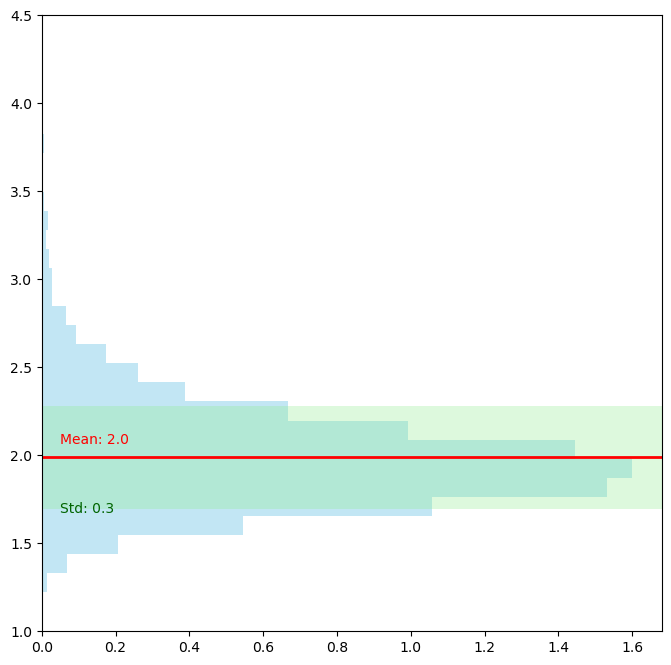

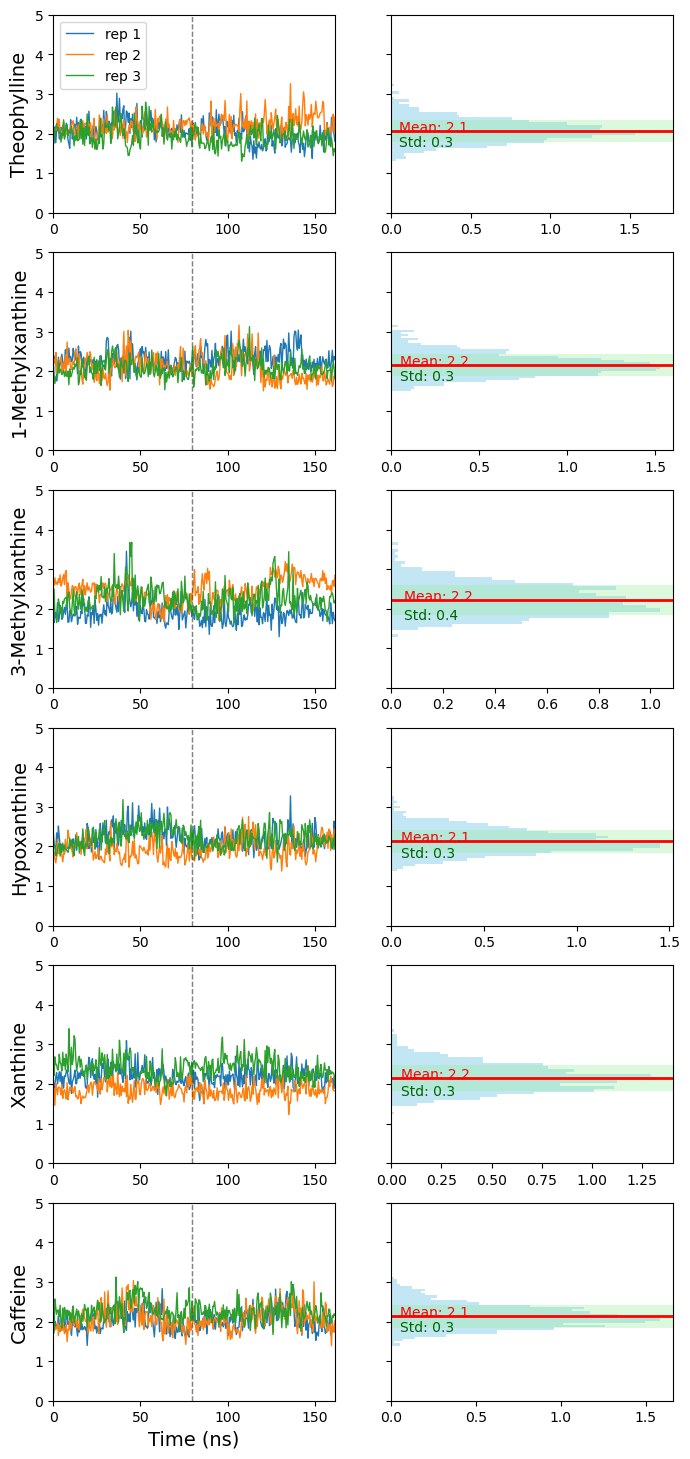

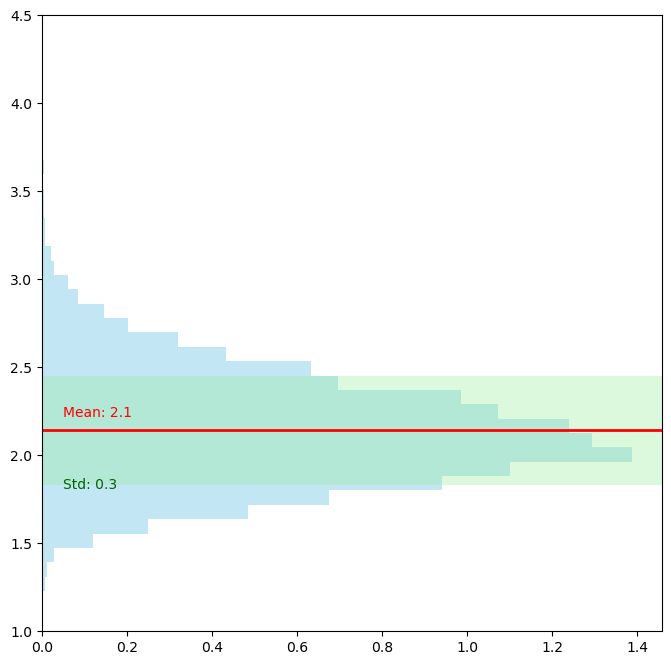

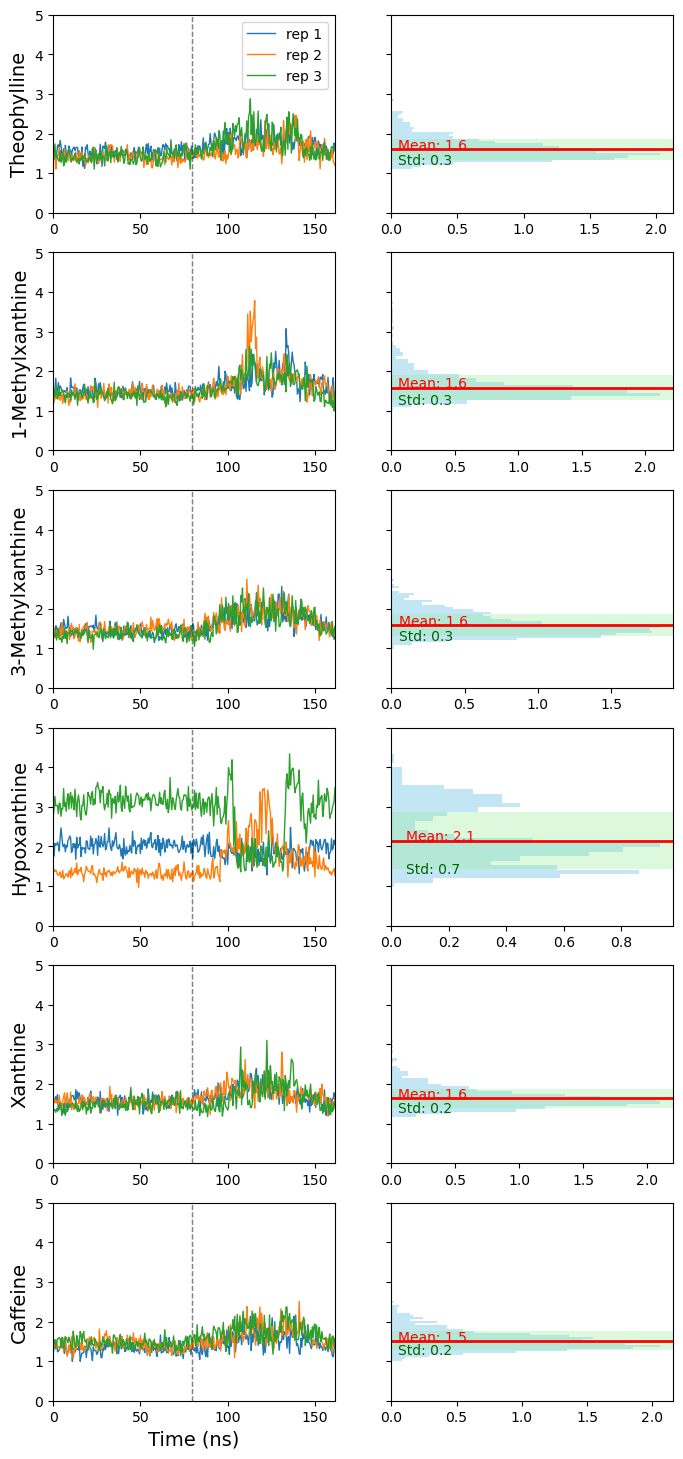

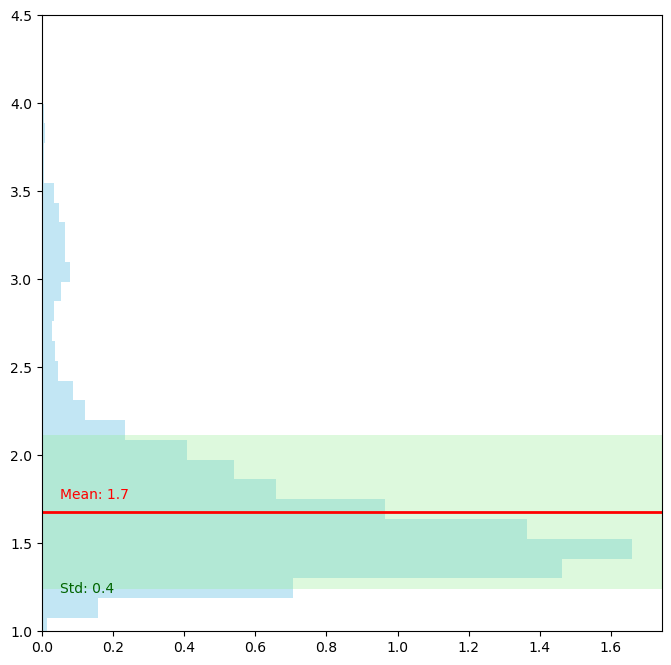

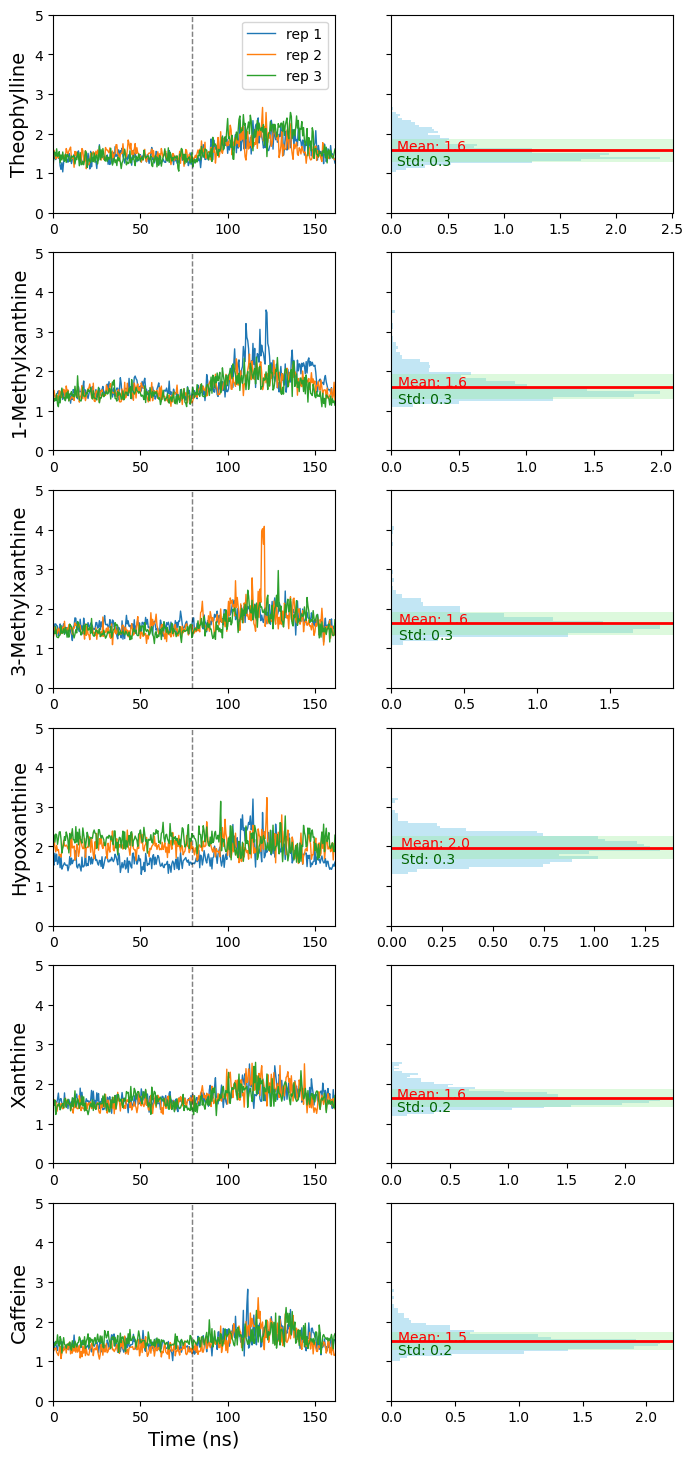

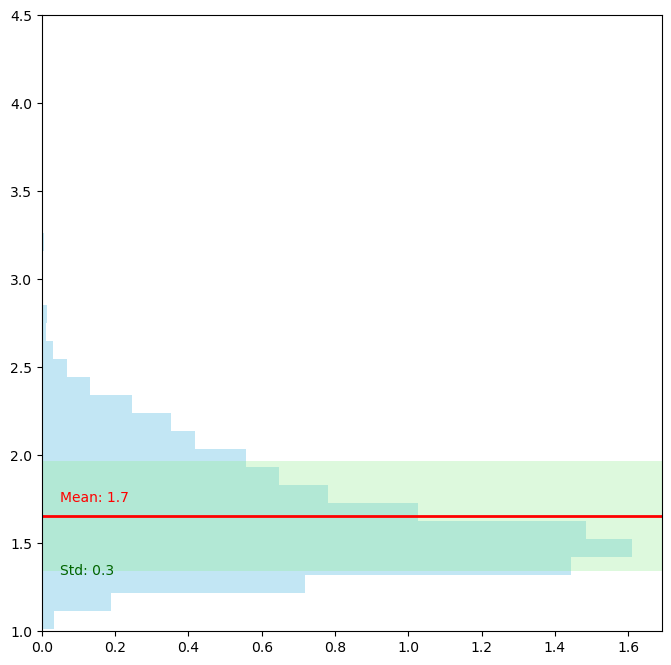

In [ ]:
file_dict = {
    #                                    salt cond.   # Mg   water.  lig ff    windows         BB rest. offset         title                     Dir name                       
    '55_NaCl_0Mg_TP3_GAF_40_1ns_unres':['55 NaCl',     '0', 'TIP3P', 'GAFF2', '40 win, 1 ns/win', 'No', 0,   "55 mM NaCl & 0 Mg$^{2+}$",   '4-55NaCl/1-40winCmplx_30winLig'],
    '55_NaCl_2Mg_TP3_GAF_40_1ns_unres':['55 NaCl',     '2', 'TIP3P', 'GAFF2', '40 win, 1 ns/win', 'No', 0,   "55 mM NaCl & 2 Mg$^{2+}$",   '3-55NaCl_Mg/1-40winCmplx_30winLig'],
    '55_NaCl_3Mg_TP3_GAF_40_1ns_unres':['55 NaCl',     '3', 'TIP3P', 'GAFF2', '40 win, 1 ns/win', 'No', 0,   "55 mM NaCl & 3 Mg$^{2+}$",   '1-55NaCl_3Mg/1-40winCmplx_30winLig'],
    '55_NaCl_0Mg_TP3_GAF_40_1ns_BBres':['55 NaCl',     '0', 'TIP3P', 'GAFF2', '40 win, 1 ns/win','Yes', 9.4, "55 mM NaCl & 0 Mg$^{2+}$\nw/ backbone restraints contribution", '9-5NaCl_bb_colvar/1-40winCmplx_30winLig'],
    '55_NaCl_2Mg_TP3_GAF_40_1ns_BBres':['55 NaCl',     '2', 'TIP3P', 'GAFF2', '40 win, 1 ns/win','Yes', 9.7, "55 mM NaCl & 2 Mg$^{2+}$\nw/ backbone restraints contribution", '8-5NaCl_Mg_bb_colvar/1-40winCmplx_30winLig']

}
cmpnd_list = [ '2-theophylline', '3-1_methylxanthine', '4-3_methylxanthine', '5-hypoxanthine', '6-xanthine', '7-caffeine' ]
# rep_list = ['1-rep1', '2-rep2', '3-rep3']

# cond_list = ['1-55NaCl_3Mg/2-OpenFF_40winCmplx_30winLig']

path_acc = "/home/arasouli/repos/alchemical/rna_small_molecule_FE/results/accept_reject_files" 
for key,val in file_dict.items():
    cond_list = val[8]
    file_pre = key
    # check #Mg and assig the mainDir
    if val[1] == '3':
        mainDir = '/home/arasouli/repos/alchemical/3_mg_rna_small_molecule_FE'
    else:
        mainDir = '/home/arasouli/repos/alchemical/rna_small_molecule_FE'
    
    acc_path = os.path.join(path_acc,key + '_accept.txt')
    content_list = []
    with open(acc_path, 'r') as file:
        for line in file:
            entries = line.strip().split('\t')
            entries_full = [os.path.join(mainDir,entr,'3-analysis/rmsd') for entr in entries]
            content_list.append(entries_full)
    
    fig_name = os.path.join(key + '_rmsd.pdf')
    for ii in content_list:
        dir_str = ii
    plotting_rmsd(dir_str,fig_name)
